# Data preprocessing and EDA PART

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Load the dataset
df = pd.read_csv("healthcare_dataset.csv")

df.head()

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Bobby JacksOn,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.281306,328,Urgent,2024-02-02,Paracetamol,Normal
1,LesLie TErRy,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.327287,265,Emergency,2019-08-26,Ibuprofen,Inconclusive
2,DaNnY sMitH,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,27955.096079,205,Emergency,2022-10-07,Aspirin,Normal
3,andrEw waTtS,28,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.782410,450,Elective,2020-12-18,Ibuprofen,Abnormal
4,adrIENNE bEll,43,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.317814,458,Urgent,2022-10-09,Penicillin,Abnormal


In [ ]:
# Step 2: Select the relevant columns
selected_columns = [
    'Age', 'Gender', 'Blood Type', 'Medical Condition',
    'Insurance Provider', 'Billing Amount', 'Admission Type', 'Test Results'
]
df = df[selected_columns].copy()

# Step 3: Check and remove missing and duplicate values
missing_counts = df.isnull().sum()
duplicate_count = df.duplicated().sum()

print("Missing values in each column:\n", missing_counts)
print("\nTotal duplicate rows:", duplicate_count)

df.dropna(inplace=True)
df.drop_duplicates(inplace=True)



Missing values in each column:
 Age                   0
Gender                0
Blood Type            0
Medical Condition     0
Insurance Provider    0
Billing Amount        0
Admission Type        0
Test Results          0
dtype: int64

Total duplicate rows: 534


In [ ]:
# Step 4: Check data types and unique value counts
print("\nData types:\n", df.dtypes)
print("\nUnique values in each column:")
for col in df.columns:
    print(f"{col}: {df[col].nunique()} unique values")

# Step 5: Clean text columns (capitalize and strip spaces)
text_columns = ['Gender', 'Blood Type', 'Medical Condition', 'Insurance Provider', 'Admission Type', 'Test Results']
for col in text_columns:
    df[col] = df[col].str.strip().str.title()

# Step 6: Descriptive statistics for numerical columns
print("\nDescriptive statistics:\n", df.describe())




Data types:
 Age                     int64
Gender                 object
Blood Type             object
Medical Condition      object
Insurance Provider     object
Billing Amount        float64
Admission Type         object
Test Results           object
dtype: object

Unique values in each column:
Age: 77 unique values
Gender: 2 unique values
Blood Type: 8 unique values
Medical Condition: 6 unique values
Insurance Provider: 5 unique values
Billing Amount: 50000 unique values
Admission Type: 3 unique values
Test Results: 3 unique values

Descriptive statistics:
                 Age  Billing Amount
count  54966.000000    54966.000000
mean      51.535185    25544.306284
std       19.605661    14208.409711
min       13.000000    -2008.492140
25%       35.000000    13243.718641
50%       52.000000    25542.749145
75%       68.000000    37819.858159
max       89.000000    52764.276736


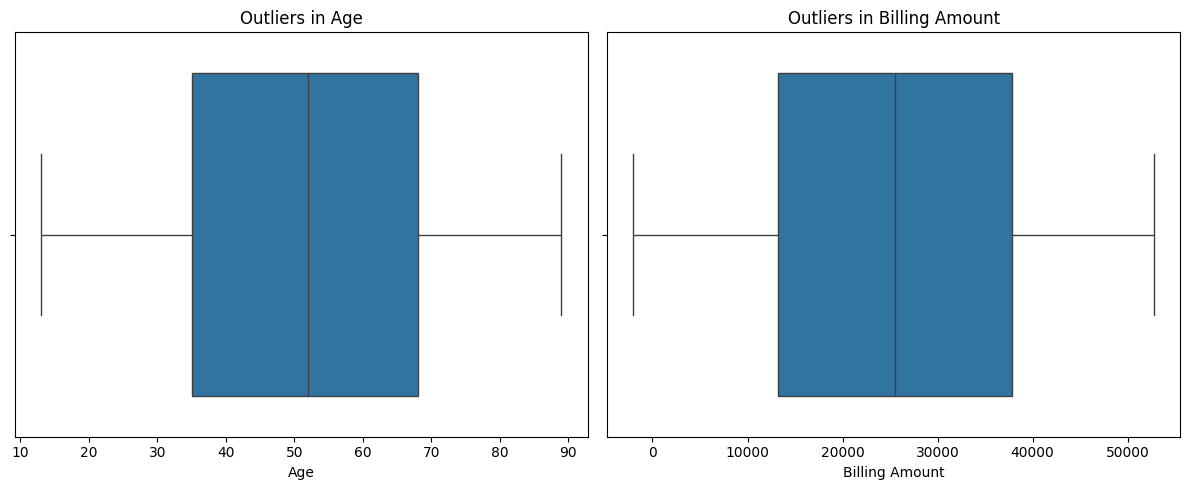

,Age,Gender,Blood Type,Medical Condition,Insurance Provider,Billing Amount,Admission Type,Test Results
1,62,Male,A+,Obesity,Medicare,33643.327287,Emergency,Inconclusive
2,76,Female,A-,Obesity,Aetna,27955.096079,Emergency,Normal
3,28,Female,O+,Diabetes,Medicare,37909.782410,Elective,Abnormal
4,43,Female,Ab+,Cancer,Aetna,14238.317814,Urgent,Abnormal
5,36,Male,A+,Asthma,Unitedhealthcare,48145.110951,Urgent,Normal


In [ ]:
# Step 7: Visual check for outliers in Age and Billing Amount
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.boxplot(x=df["Age"])
plt.title("Outliers in Age")

plt.subplot(1, 2, 2)
sns.boxplot(x=df["Billing Amount"])
plt.title("Outliers in Billing Amount")

plt.tight_layout()
plt.show()

# Step 8: Preview cleaned data (from index 1)
df.iloc[1:6]


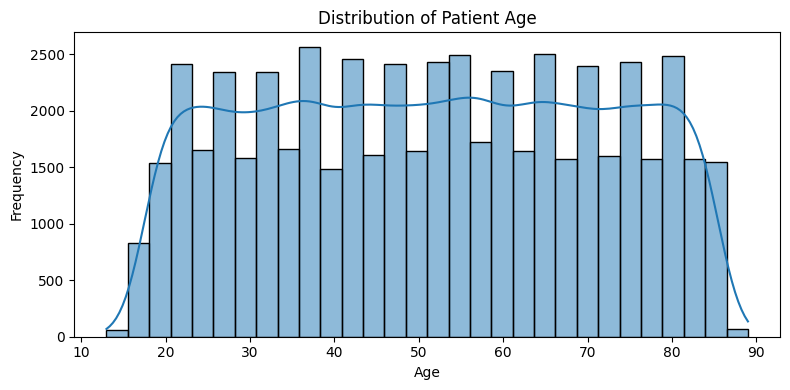

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Distribution of Age
plt.figure(figsize=(8, 4))
sns.histplot(df['Age'], bins=30, kde=True)
plt.title("Distribution of Patient Age")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()



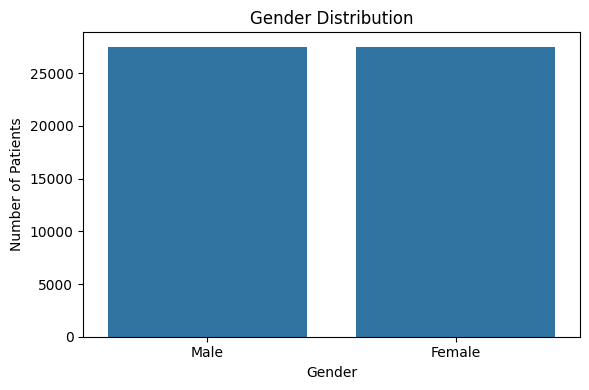

In [ ]:
# 2. Gender Distribution (Countplot)
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Gender')
plt.title("Gender Distribution")
plt.xlabel("Gender")
plt.ylabel("Number of Patients")
plt.tight_layout()
plt.show()



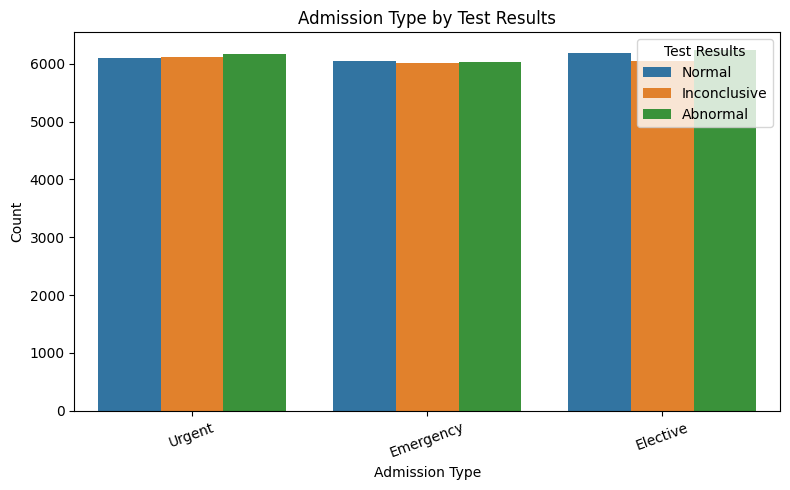

In [ ]:
# 3. Admission Type vs Test Results
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Admission Type', hue='Test Results')
plt.title("Admission Type by Test Results")
plt.xlabel("Admission Type")
plt.ylabel("Count")
plt.xticks(rotation=20)
plt.tight_layout()
plt.show()



<ipython-input-60-61521f900453>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Test Results', data=df, order=['Normal', 'Abnormal'], palette='Set2')


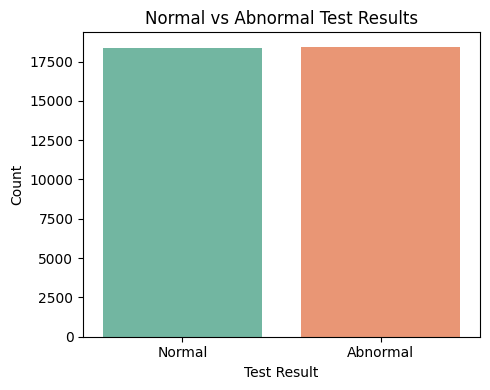

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count plot: Normal vs Abnormal
plt.figure(figsize=(5, 4))
sns.countplot(x='Test Results', data=df, order=['Normal', 'Abnormal'], palette='Set2')
plt.title('Normal vs Abnormal Test Results')
plt.xlabel('Test Result')
plt.ylabel('Count')
plt.tight_layout()
plt.show()


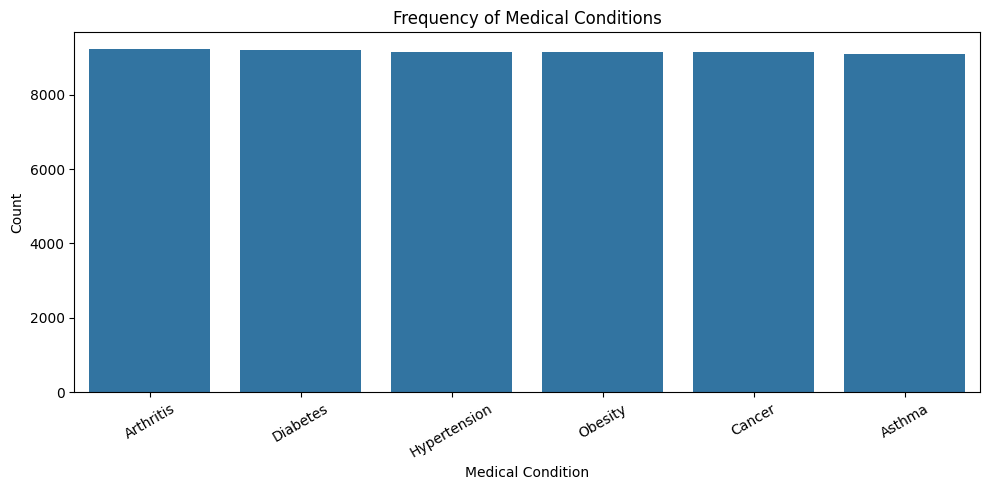

In [ ]:
# 4. Medical Condition Frequency
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='Medical Condition', order=df['Medical Condition'].value_counts().index)
plt.title("Frequency of Medical Conditions")
plt.xlabel("Medical Condition")
plt.ylabel("Count")
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()



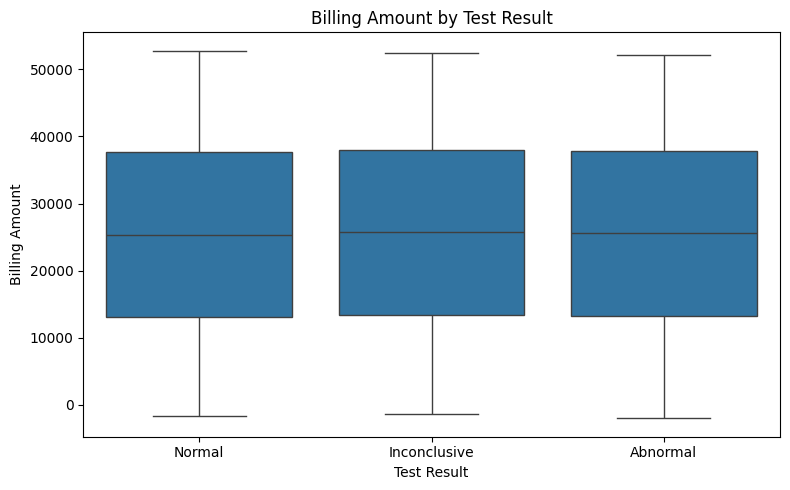

In [ ]:
# 5. Boxplot of Billing Amount grouped by Test Result
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='Test Results', y='Billing Amount')
plt.title("Billing Amount by Test Result")
plt.xlabel("Test Result")
plt.ylabel("Billing Amount")
plt.tight_layout()
plt.show()


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Make a copy of the original cleaned DataFrame
df_binary = df[df['Test Results'].isin(['Normal', 'Abnormal'])].copy()

# Drop less important features
df_binary.drop(columns=['Gender', 'Admission Type'], inplace=True)

# Columns to be encoded (remaining relevant categoricals)
columns_to_encode = [
    'Blood Type',
    'Medical Condition',
    'Insurance Provider',
    'Test Results'  # Target variable
]

# Dictionary to keep track of encoders and label mappings
encoders = {}
label_mappings = {}

# Encode each column and store the encoder and class mapping
for col in columns_to_encode:
    le = LabelEncoder()
    df_binary[col] = le.fit_transform(df_binary[col])
    encoders[col] = le
    label_mappings[col] = dict(zip(le.classes_, le.transform(le.classes_)))

# Show encoded label mappings
for col, mapping in label_mappings.items():
    print(f"Encoding for '{col}': {mapping}")


Encoding for 'Blood Type': {'A+': np.int64(0), 'A-': np.int64(1), 'Ab+': np.int64(2), 'Ab-': np.int64(3), 'B+': np.int64(4), 'B-': np.int64(5), 'O+': np.int64(6), 'O-': np.int64(7)}
Encoding for 'Medical Condition': {'Arthritis': np.int64(0), 'Asthma': np.int64(1), 'Cancer': np.int64(2), 'Diabetes': np.int64(3), 'Hypertension': np.int64(4), 'Obesity': np.int64(5)}
Encoding for 'Insurance Provider': {'Aetna': np.int64(0), 'Blue Cross': np.int64(1), 'Cigna': np.int64(2), 'Medicare': np.int64(3), 'Unitedhealthcare': np.int64(4)}
Encoding for 'Test Results': {'Abnormal': np.int64(0), 'Normal': np.int64(1)}


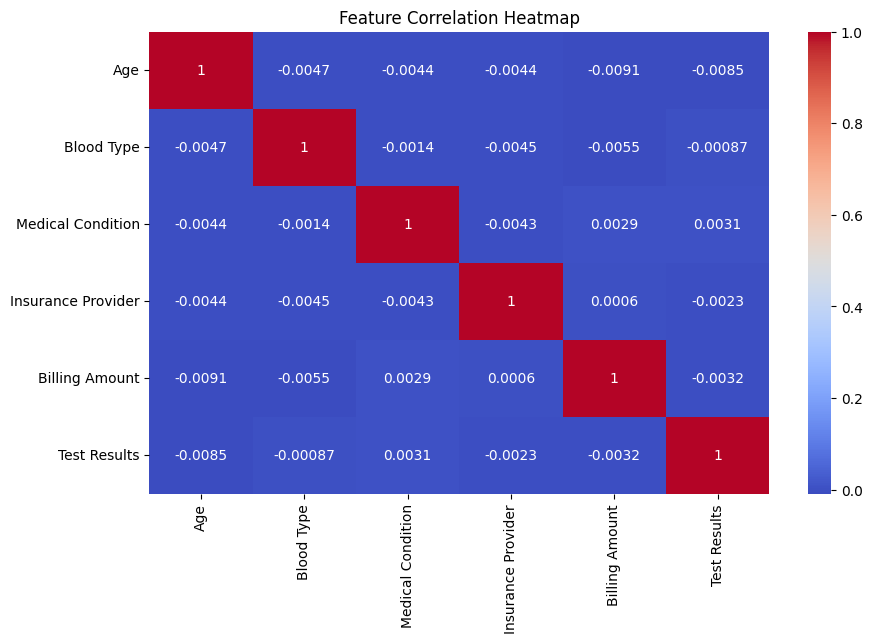

In [ ]:
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.heatmap(df_binary.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()


In [ ]:
# Separate features (X) and target (y)
X = df_binary.drop('Test Results', axis=1)
y = df_binary['Test Results']


In [ ]:
from sklearn.model_selection import train_test_split

# Split data with stratification to maintain class balance
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y
)

from imblearn.over_sampling import SMOTE
X_train, y_train = SMOTE().fit_resample(X_train, y_train)



In [ ]:
from sklearn.preprocessing import StandardScaler

# Scale numeric features for SVM
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

xgb_model = XGBClassifier(random_state=42)
xgb_model.fit(X_train_scaled, y_train)

y_pred_xgb = xgb_model.predict(X_test_scaled)

print("XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("XGBoost Confusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb))
print("XGBoost Report:\n", classification_report(y_test, y_pred_xgb, target_names=['Abnormal', 'Normal']))


XGBoost Accuracy: 0.5225727495240685
XGBoost Confusion Matrix:
 [[1961 1727]
 [1784 1882]]
XGBoost Report:
               precision    recall  f1-score   support

    Abnormal       0.52      0.53      0.53      3688
      Normal       0.52      0.51      0.52      3666

    accuracy                           0.52      7354
   macro avg       0.52      0.52      0.52      7354
weighted avg       0.52      0.52      0.52      7354



In [ ]:
from sklearn.svm import SVC

svm_model = SVC(kernel='rbf', random_state=42)
svm_model.fit(X_train_scaled, y_train)

y_pred_svm = svm_model.predict(X_test_scaled)

print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))
print("SVM Confusion Matrix:\n", confusion_matrix(y_test, y_pred_svm))
print("SVM Report:\n", classification_report(y_test, y_pred_svm, target_names=['Abnormal', 'Normal']))


SVM Accuracy: 0.5063910796845255
SVM Confusion Matrix:
 [[1867 1821]
 [1809 1857]]
SVM Report:
               precision    recall  f1-score   support

    Abnormal       0.51      0.51      0.51      3688
      Normal       0.50      0.51      0.51      3666

    accuracy                           0.51      7354
   macro avg       0.51      0.51      0.51      7354
weighted avg       0.51      0.51      0.51      7354



Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1475/1475 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.4943 - loss: 0.6967 - val_accuracy: 0.5039 - val_loss: 0.6939
Epoch 2/50
1475/1475 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.5062 - loss: 0.6933 - val_accuracy: 0.4919 - val_loss: 0.6950
Epoch 3/50
1475/1475 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.5113 - loss: 0.6929 - val_accuracy: 0.5159 - val_loss: 0.6929
Epoch 4/50
1475/1475 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.5196 - loss: 0.6925 - val_accuracy: 0.4961 - val_loss: 0.6941
Epoch 5/50
1475/1475 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.5160 - loss: 0.6922 - val_accuracy: 0.4988 - val_loss: 0.6937
Epoch 6/50
1475/1475 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.5044 - loss: 0.6927 - val_accuracy: 0.4893 - val_loss: 0.6946
Epoch 7/50
1475/1475 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.5183 - loss: 0.6923 - val_accuracy: 0.4983 - val_loss: 0.6932
Epoch 8/50
1475/1475 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.5131 - loss: 0.6925 - val_accurac

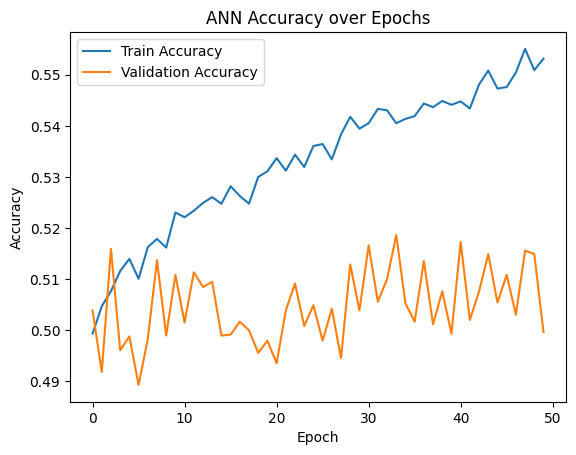

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

# Build ANN model
ann_model = Sequential([
    Dense(64, input_dim=X_train_scaled.shape[1], activation='relu'),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

ann_model.compile(optimizer=Adam(0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Train
history = ann_model.fit(X_train_scaled, y_train, validation_split=0.2, epochs=50, batch_size=16, verbose=1)

# Evaluate
loss, acc = ann_model.evaluate(X_test_scaled, y_test)
print(f"ANN Test Accuracy: {acc}")

# Plot training history
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title("ANN Accuracy over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


In [ ]:
# Hyperparameter tuning using RandomizedSearchCVM

In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV

xgb_params = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 4, 5, 6],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}

xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

xgb_search = RandomizedSearchCV(xgb_model, xgb_params, n_iter=10, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)
xgb_search.fit(X_train, y_train)

print("Best XGBoost Parameters:", xgb_search.best_params_)
print("Best XGBoost Accuracy:", xgb_search.best_score_)


Fitting 5 folds for each of 10 candidates, totalling 50 fits


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [23:25:04] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Best XGBoost Parameters: {'subsample': 0.8, 'n_estimators': 300, 'max_depth': 6, 'learning_rate': 0.2, 'colsample_bytree': 0.8}
Best XGBoost Accuracy: 0.5190524564634627


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import SVC

svm_params = {
    'C': [0.1, 1, 10],
    'gamma': ['scale', 'auto', 0.01, 0.001],
    'kernel': ['rbf', 'linear']
}

svm_random = RandomizedSearchCV(SVC(), svm_params, n_iter=6, cv=3, scoring='accuracy', n_jobs=-1, verbose=1)
svm_random.fit(X_train_scaled, y_train)

print("Best SVM Parameters:", svm_random.best_params_)
print("Best SVM Accuracy:", svm_random.best_score_)


Fitting 3 folds for each of 6 candidates, totalling 18 fits
Best SVM Parameters: {'kernel': 'rbf', 'gamma': 'scale', 'C': 1}
Best SVM Accuracy: 0.5046105464374115


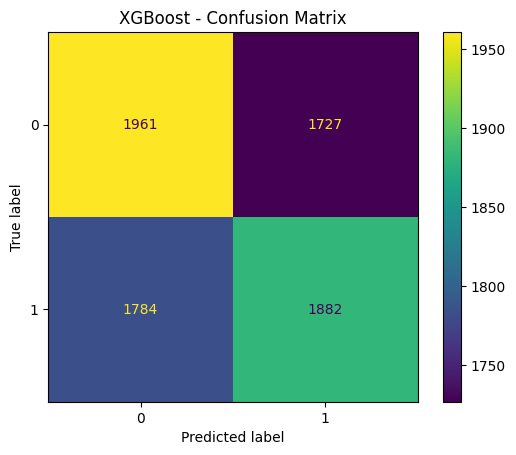

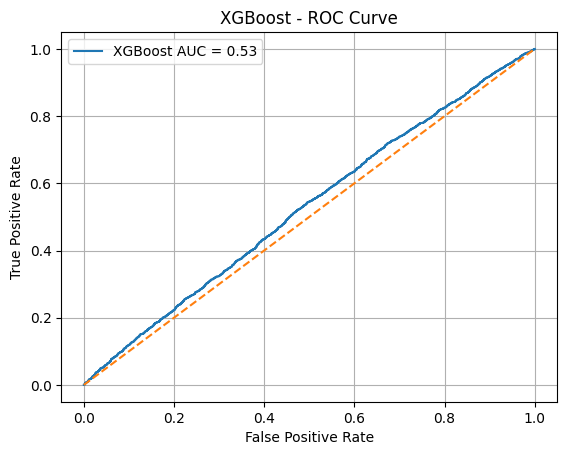

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Confusion Matrix
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_xgb)
plt.title("XGBoost - Confusion Matrix")
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_xgb)
auc_xgb = roc_auc_score(y_test, y_pred_xgb)


plt.plot(fpr, tpr, label=f"XGBoost AUC = {auc_xgb:.2f}")
plt.plot([0, 1], [0, 1], linestyle='--')
plt.title("XGBoost - ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid(True)
plt.show()


230/230 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


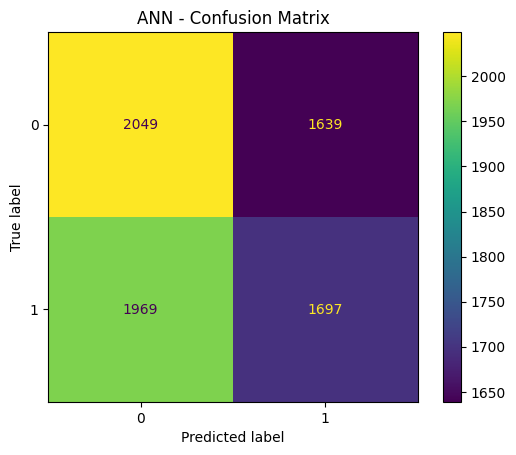

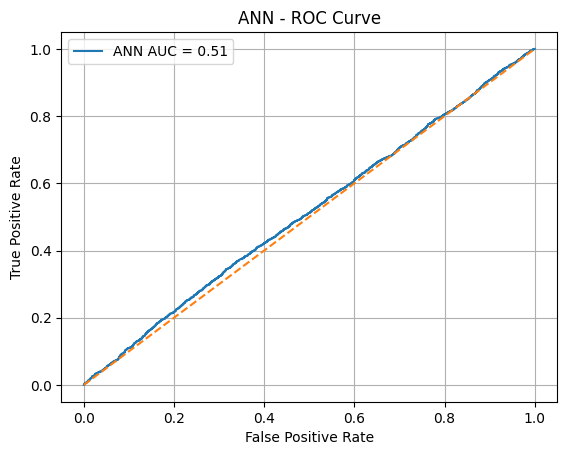

In [ ]:
# Predict probabilities and threshold
y_proba_ann = ann_model.predict(X_test_scaled).flatten()
y_pred_ann = (y_proba_ann >= 0.5).astype(int)

# Confusion Matrix
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_ann)
plt.title("ANN - Confusion Matrix")
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_proba_ann)
auc_ann = roc_auc_score(y_test, y_proba_ann)

plt.plot(fpr, tpr, label=f"ANN AUC = {auc_ann:.2f}")
plt.plot([0, 1], [0, 1], linestyle='--')
plt.title("ANN - ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid(True)
plt.show()


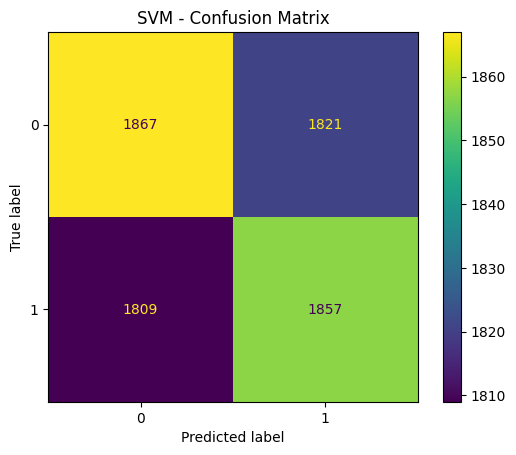

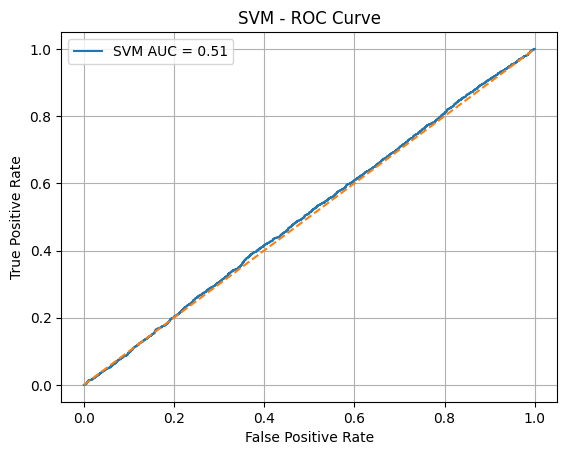

In [ ]:
# Confusion Matrix
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_svm)
plt.title("SVM - Confusion Matrix")
plt.show()

# ROC Curve using decision_function
y_scores_svm = svm_model.decision_function(X_test_scaled)
fpr, tpr, _ = roc_curve(y_test, y_scores_svm)
auc_svm = roc_auc_score(y_test, y_scores_svm)

plt.plot(fpr, tpr, label=f"SVM AUC = {auc_svm:.2f}")
plt.plot([0, 1], [0, 1], linestyle='--')
plt.title("SVM - ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid(True)
plt.show()


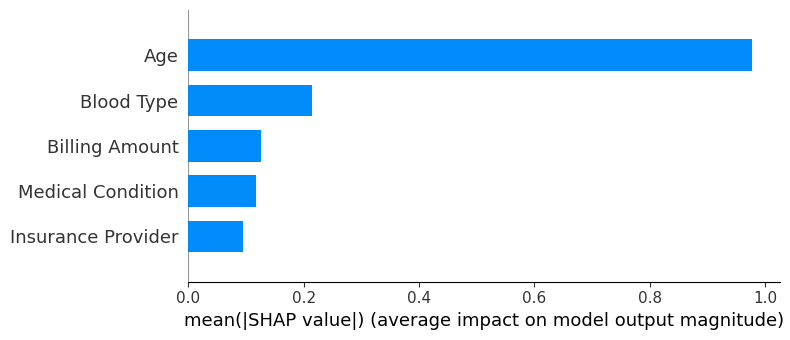

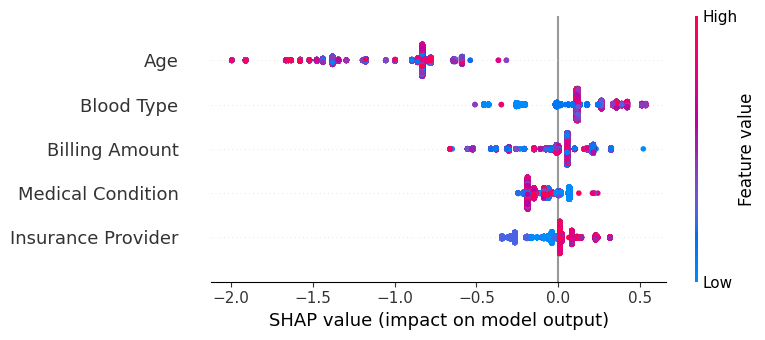

In [ ]:
import shap

# Initialize SHAP explainer for tree-based model
explainer = shap.TreeExplainer(xgb_model)
shap_values = explainer.shap_values(X_test)

# Summary plot
shap.summary_plot(shap_values, X_test, plot_type="bar")
# This shows the impact of features across samples
shap.summary_plot(shap_values, X_test)
